In [1]:
 # Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [2]:
df = pd.read_csv("../testing/Resources/data_cleaned.csv")
df.head()

,HeartDisease,BMICategory,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Underweight (BMI < 18.5),Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,Normal weight (18.5 <= BMI < 25.0),No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Overweight (25.0 <= BMI < 30.0),Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,Normal weight (18.5 <= BMI < 25.0),No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,Normal weight (18.5 <= BMI < 25.0),No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No


In [3]:
data_model = df.copy()

## Defining functions for data encoding 

In [4]:
def encode_binary(value):
    if value == "Yes":
        return 1
    if value == "No":
        return 0

In [5]:
def encode_sex (sex):
    if sex == "Female":
        return 0
    if sex == "Male":
        return 1

## Encoding binary features

In [6]:
data_model["HeartDisease"] = data_model["HeartDisease"].apply(encode_binary)
data_model["Smoking"] = data_model["Smoking"].apply(encode_binary)
data_model["AlcoholDrinking"] = data_model["AlcoholDrinking"].apply(encode_binary)
data_model["Stroke"] = data_model["Stroke"].apply(encode_binary)
data_model["DiffWalking"] = data_model["DiffWalking"].apply(encode_binary)
data_model["PhysicalActivity"] = data_model["PhysicalActivity"].apply(encode_binary)
data_model["Asthma"] = data_model["Asthma"].apply(encode_binary)
data_model["KidneyDisease"] = data_model["KidneyDisease"].apply(encode_binary)
data_model["SkinCancer"] = data_model["SkinCancer"].apply(encode_binary)
data_model["Diabetic"] = data_model["Diabetic"].apply(encode_binary)

In [7]:
data_model["Sex"] = data_model["Sex"].apply(encode_sex)

In [8]:
data_model.head()

,HeartDisease,BMICategory,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,0,Underweight (BMI < 18.5),1,0,0,0,0,55-59,White,1,1,Very good,1,0,1
1,0,Normal weight (18.5 <= BMI < 25.0),0,0,1,0,0,80 or older,White,0,1,Very good,0,0,0
2,0,Overweight (25.0 <= BMI < 30.0),1,0,0,0,1,65-69,White,1,1,Fair,1,0,0
3,0,Normal weight (18.5 <= BMI < 25.0),0,0,0,0,0,75-79,White,0,0,Good,0,0,1
4,0,Normal weight (18.5 <= BMI < 25.0),0,0,0,1,0,40-44,White,0,1,Very good,0,0,0


## Creating dummies for categorical features

In [9]:
dummies_columns = data_model[["BMICategory","AgeCategory","Race","GenHealth"]].columns

In [10]:
dummies = pd.get_dummies(data_model[["BMICategory","AgeCategory","Race","GenHealth"]])

In [11]:
data_dummies = data_model.copy()

In [12]:
data_dummies = data_dummies.drop(columns=dummies_columns)

In [13]:
data_model_df = pd.concat([data_dummies, dummies], axis=1)

In [14]:
data_model_df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,Asthma,KidneyDisease,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,1,0,0,0,0,1,1,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,1,1,1,1,0,...,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [15]:
data_model_df.to_csv("../testing/Resources/data_encoded.csv", index=False)

 ## Define features set

In [16]:
X = data_model_df.copy()
X.drop("HeartDisease", axis=1, inplace=True)
X.head()

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,1,0,0,0,0,1,1,1,0,1,...,0,0,0,0,1,0,0,0,0,1
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,1,1,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


## Defining target variable

In [17]:
y = data_model_df["HeartDisease"]
y[:10]

0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: HeartDisease, dtype: int64

## Creating subsets for model training and testing

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [19]:
X_train.shape

(239846, 38)

In [20]:
X_test.shape

(79949, 38)

# RandomOverSampler

In [22]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros=RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_res,y_res=ros.fit_resample(X_train,y_train)

In [23]:
X_res

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,0,1,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438535,1,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
438536,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
438537,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
438538,0,0,0,1,1,1,0,0,1,1,...,0,0,0,0,1,0,1,0,0,0


In [24]:
y_res.shape


(438540,)

In [25]:
X_res.shape

(438540, 38)

In [26]:
X_test.shape

(79949, 38)

In [27]:
y_test.shape

(79949,)

In [28]:
y_res = pd.DataFrame(y_res)

In [29]:
y_res

,HeartDisease
0,0
1,0
2,0
3,1
4,0
...,...
438535,1
438536,1
438537,1
438538,1


In [30]:
y_res.value_counts()

HeartDisease
0               219270
1               219270
dtype: int64

## Data Resampling

In [31]:
X = pd.concat([X_res, y_res], axis=1)



In [32]:
X

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,...,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,HeartDisease
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1
4,1,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438535,1,0,1,0,1,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
438536,0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,1
438537,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
438538,0,0,0,1,1,1,0,0,1,1,...,0,0,0,1,0,1,0,0,0,1


In [33]:
No_heart_desease = X[X.HeartDisease == 0]
Yes_heart_desease = X[X.HeartDisease == 1]


In [34]:
from sklearn.utils import resample
Heart_upsampled = resample(Yes_heart_desease,
                          replace=True,
                          n_samples=len(No_heart_desease),
                          random_state=70)

In [35]:
Heart_upsampled 

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,...,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,HeartDisease
437496,1,0,1,1,0,0,1,1,1,0,...,0,0,0,1,0,0,0,1,0,1
376258,1,1,0,1,1,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
371905,1,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1
300038,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
395834,1,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394976,1,0,1,1,0,1,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
430091,0,0,0,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,1
286381,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
288141,1,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [36]:
heart_upsampled = pd.concat([No_heart_desease, Heart_upsampled])

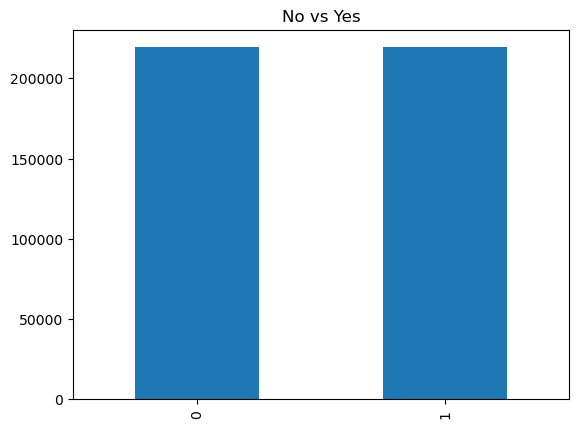

In [37]:
heart_upsampled.HeartDisease.value_counts().plot(kind="bar", title="No vs Yes");

In [38]:
y_train = heart_upsampled.HeartDisease
X_train = heart_upsampled.drop('HeartDisease', axis=1)

In [39]:
X_train.shape

(438540, 38)

In [40]:
y_train.shape

(438540,)

In [41]:
scaler = StandardScaler()

In [42]:
X_scaler = scaler.fit(X_train)

In [43]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Random forest Classifier

In [44]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [45]:
y_train

0         0
1         0
2         0
4         0
5         0
         ..
394976    1
430091    1
286381    1
288141    1
375065    1
Name: HeartDisease, Length: 438540, dtype: int64

In [46]:
y_train2=y_train.ravel()

In [47]:
y_train2

array([0, 0, 0, ..., 1, 1, 1])

In [48]:
rf_model = rf_model.fit(X_train_scaled, y_train2)

In [49]:
predictions = rf_model.predict(X_test_scaled)

In [50]:
y_test2=y_test.ravel()

In [51]:
y_test2

array([0, 0, 1, ..., 0, 0, 0])

In [52]:
cm = confusion_matrix(y_test2, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

#Calculating the accuracy score
acc_score = accuracy_score(y_test2, predictions)

In [53]:
 #Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test2, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,58396,14756
Actual 1,3066,3731


Accuracy Score : 0.7770828903425934
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.80      0.87     73152
           1       0.20      0.55      0.30      6797

    accuracy                           0.78     79949
   macro avg       0.58      0.67      0.58     79949
weighted avg       0.89      0.78      0.82     79949



# Logistic regression

In [54]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='lbfgs',
                                max_iter=500,
                                random_state=42)
lr_model

LogisticRegression(max_iter=500, random_state=42)

In [55]:
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [56]:
predictions_train = lr_model.predict(X_train_scaled)

In [57]:
 # Calculating the confusion matrix with training data
cm = confusion_matrix(y_train, predictions_train)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score_train = accuracy_score(y_train, predictions_train)

In [58]:
 # Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score_train}")
print("Classification Report")
print(classification_report(y_train, predictions_train))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,164186,55084
Actual 1,47006,172264


Accuracy Score : 0.7672048159802982
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.75      0.76    219270
           1       0.76      0.79      0.77    219270

    accuracy                           0.77    438540
   macro avg       0.77      0.77      0.77    438540
weighted avg       0.77      0.77      0.77    438540



In [59]:
import pickle

In [60]:
# Save the model as a .pkl file
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)